In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Advertising Budget and Sales.csv")

In [3]:
data.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
data.shape

(200, 5)

In [5]:
data.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

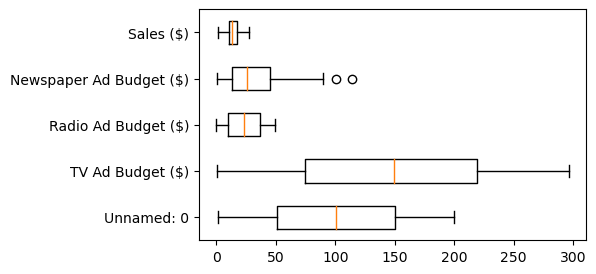

In [9]:
plt.figure(figsize=[5,3])
plt.boxplot(data,vert = False,data=data,labels=data.columns)
plt.show()

<AxesSubplot:xlabel='TV Ad Budget ($)', ylabel='Count'>

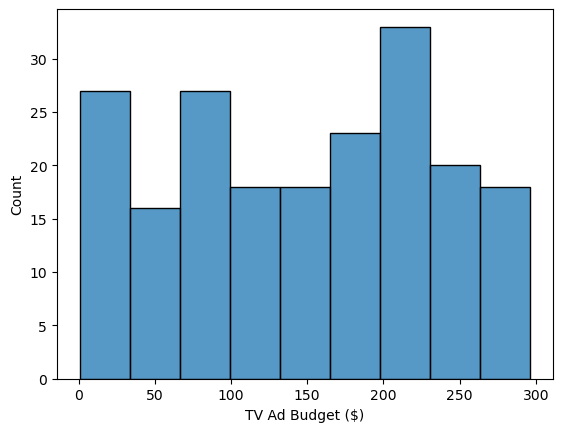

In [10]:
sns.histplot(data['TV Ad Budget ($)'])

<AxesSubplot:xlabel='Newspaper Ad Budget ($)', ylabel='Count'>

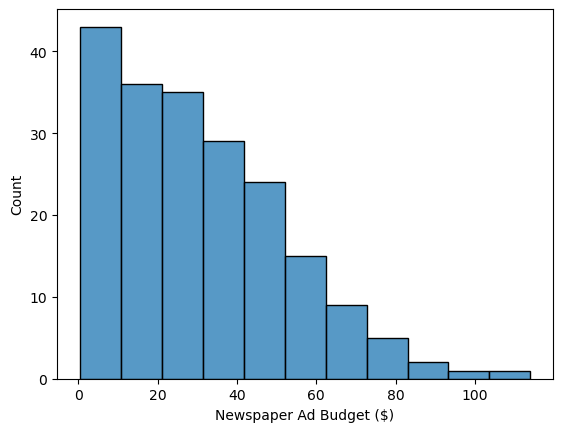

In [11]:
sns.histplot(data['Newspaper Ad Budget ($)'])

<AxesSubplot:xlabel='Radio Ad Budget ($)', ylabel='Count'>

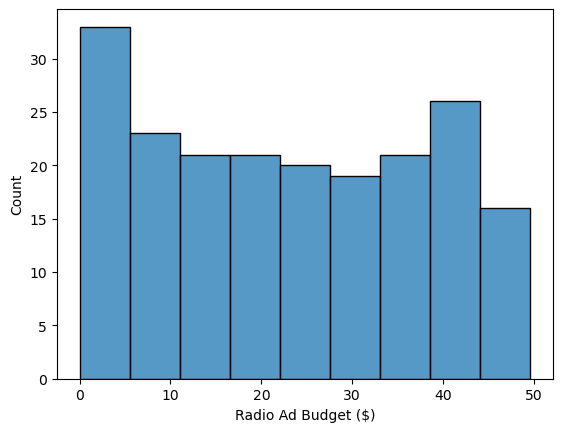

In [12]:
sns.histplot(data['Radio Ad Budget ($)'])

<AxesSubplot:xlabel='Sales ($)', ylabel='Count'>

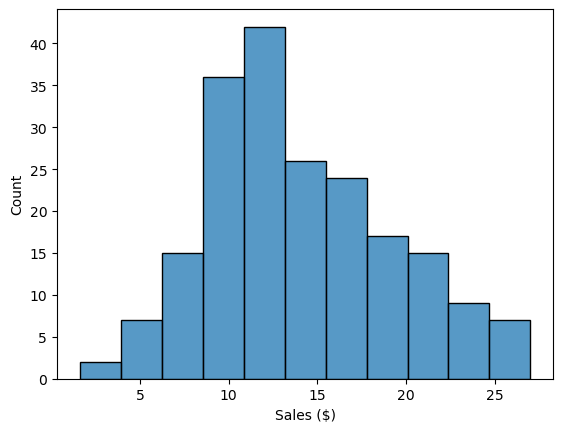

In [13]:
sns.histplot(data['Sales ($)'])

<AxesSubplot:xlabel='Newspaper Ad Budget ($)', ylabel='Density'>

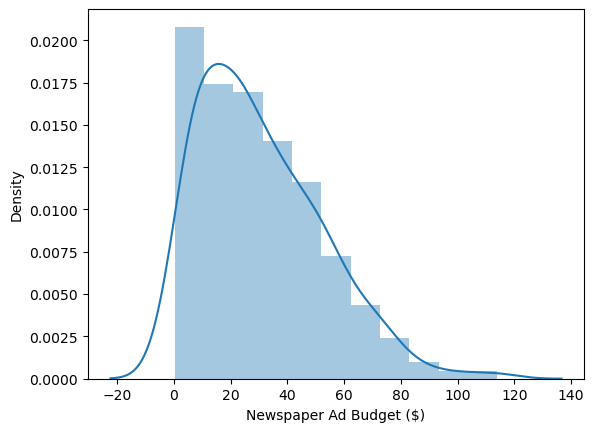

In [14]:
sns.distplot(data['Newspaper Ad Budget ($)'])

<AxesSubplot:xlabel='TV Ad Budget ($)', ylabel='Density'>

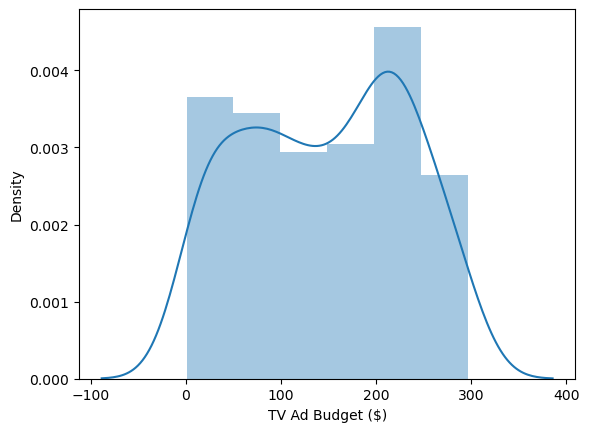

In [15]:
sns.distplot(data['TV Ad Budget ($)'])

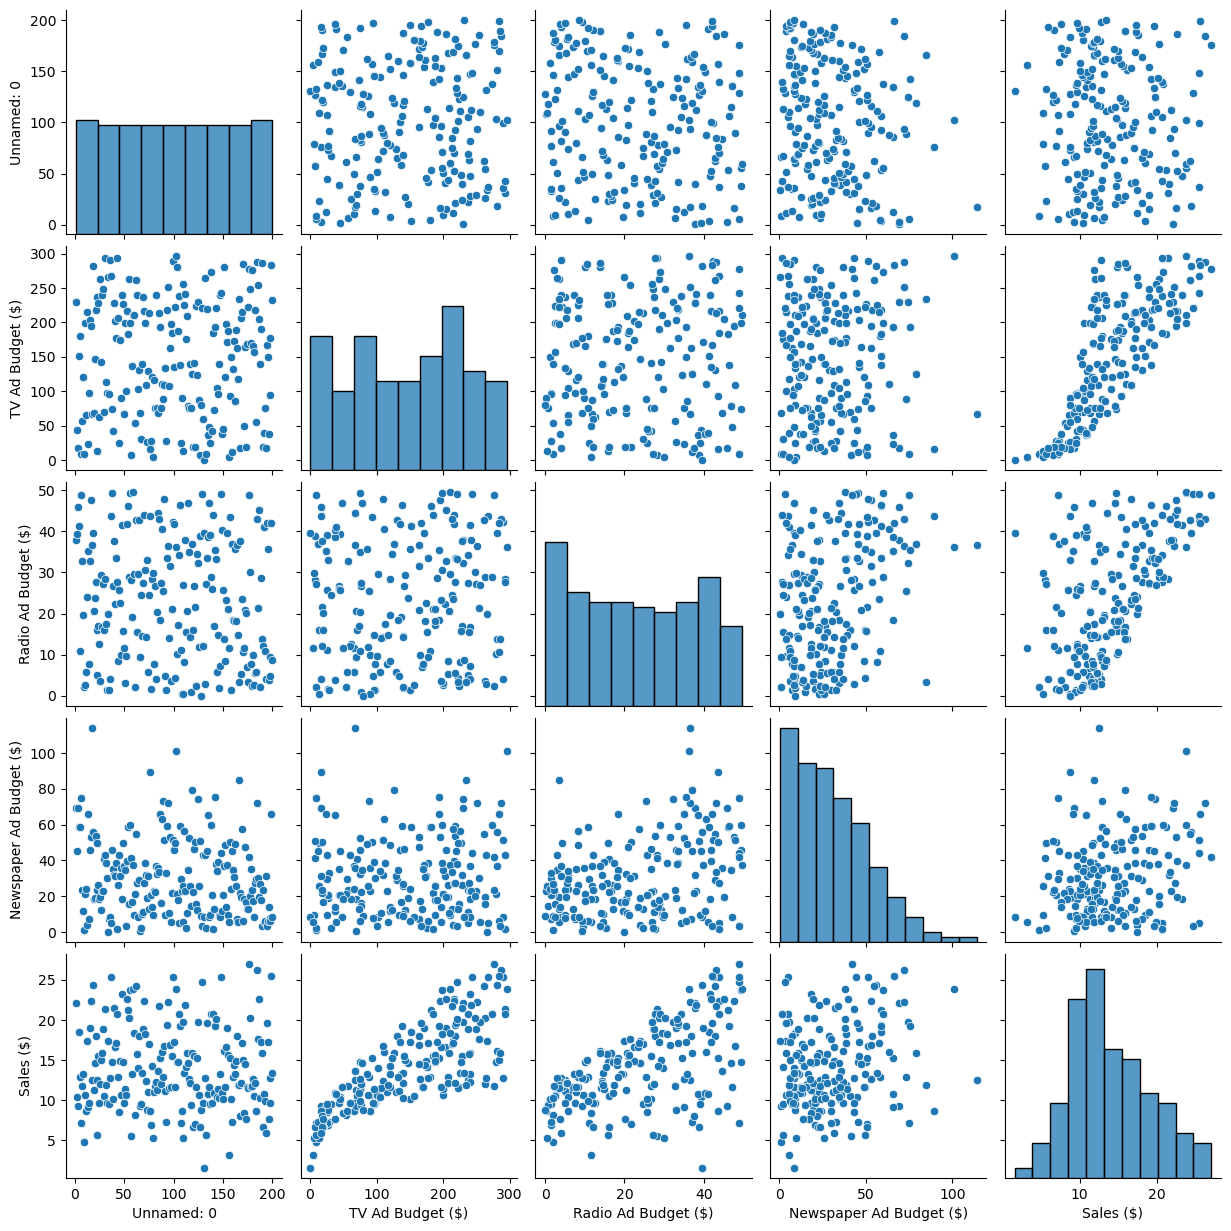

In [16]:
sns.pairplot(data)

<AxesSubplot:>

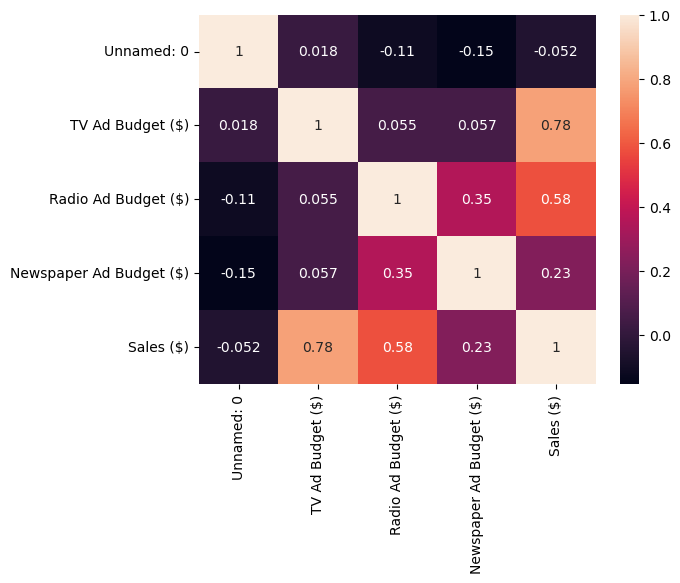

In [17]:
sns.heatmap(data.corr(),annot=True)

In [18]:
x=data.iloc[:,:-1]

In [19]:
x

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [20]:
y=data.iloc[:,-1:]

In [21]:
y

,Sales ($)
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=50)

In [24]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 4)
(140, 4)
(60, 4)


In [25]:
xtrain,ytrain

(     Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
 114         115              78.2                 46.8   
 187         188             191.1                 28.7   
 76           77              27.5                  1.6   
 122         123             224.0                  2.4   
 142         143             220.5                 33.2   
 ..          ...               ...                  ...   
 132         133               8.4                 27.2   
 33           34             265.6                 20.0   
 109         110             255.4                 26.9   
 139         140             184.9                 43.9   
 176         177             248.4                 30.2   
 
      Newspaper Ad Budget ($)  
 114                     34.5  
 187                     18.2  
 76                      20.7  
 122                     15.6  
 142                     37.9  
 ..                       ...  
 132                      2.1  
 33                       0.3  
 1

In [26]:
xtest,ytest

(     Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  \
 112         113             175.7                 15.4   
 165         166             234.5                  3.4   
 12           13              23.8                 35.1   
 73           74             129.4                  5.7   
 144         145              96.2                 14.8   
 20           21             218.4                 27.7   
 199         200             232.1                  8.6   
 8             9               8.6                  2.1   
 39           40             228.0                 37.7   
 88           89              88.3                 25.5   
 81           82             239.8                  4.1   
 197         198             177.0                  9.3   
 69           70             216.8                 43.9   
 160         161             172.5                 18.1   
 25           26             262.9                  3.5   
 99          100             135.2                 41.7 

In [27]:
model = LinearRegression()

In [28]:
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
yprediction = model.predict(xtest)
yprediction                            

array([[13.86660248],
       [15.09122325],
       [10.5428675 ],
       [10.06862959],
       [10.24910194],
       [18.38400605],
       [15.43781443],
       [ 3.41095411],
       [20.52319628],
       [11.99116678],
       [15.07519697],
       [12.92630305],
       [21.10636349],
       [14.43469198],
       [15.8996561 ],
       [16.97846118],
       [10.34269083],
       [16.72132566],
       [ 9.59818033],
       [12.57345487],
       [16.90193979],
       [10.15264682],
       [ 7.99503187],
       [14.04311643],
       [21.37664716],
       [14.22443723],
       [ 7.21209617],
       [ 7.49320029],
       [15.43555387],
       [13.6627843 ],
       [14.9149455 ],
       [10.26985961],
       [11.98342451],
       [16.45185654],
       [ 6.58910936],
       [ 9.67128977],
       [12.9604131 ],
       [20.46887764],
       [ 9.17441325],
       [11.29277888],
       [ 7.3579929 ],
       [24.71036914],
       [ 9.75763102],
       [18.32631998],
       [16.52218695],
       [12

In [30]:
model.score(xtrain,ytrain)*100

90.28999169290228

In [31]:
model.score(xtest,ytest)*100

85.73373416309352

In [32]:
mean_squared_error(ytest,yprediction)

2.654784047339553

In [33]:
mean_absolute_error(ytest,yprediction)

1.2428973494552584

In [34]:
r2_score(ytest,yprediction)*100

85.73373416309352

In [35]:
prediction = np.sqrt(mean_squared_error(ytest,yprediction))
prediction

1.6293508054865142

In [36]:
cv = KFold(n_splits=5,shuffle=True,random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [37]:
score = cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore = np.mean(score)
finalscore

0.8903305406663581